In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('/content/AANN_case4_with_pca_with_smote.csv')
df.head()


,age,workclass,fnlwgt,education,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,income
0,31.0,' Private',157640.0,' HS-grad',' Married-civ-spouse',' Prof-specialty',' Husband',' White',' Male',55.0,' United-States',H
1,44.0,' Private',222504.0,' Some-college',' Married-civ-spouse',' Adm-clerical',' Wife',' White',' Female',45.0,' United-States',H
2,52.0,' Private',146567.0,' HS-grad',' Divorced',' Machine-op-inspct',' Not-in-family',' Black',' Male',40.0,' United-States',H
3,55.0,' Private',143266.0,' Assoc-voc',' Married-civ-spouse',' Craft-repair',' Husband',' White',' Male',50.0,' Hungary',H
4,29.0,' Private',278637.0,' Bachelors',' Married-civ-spouse',' Sales',' Husband',' White',' Male',45.0,' United-States',H


In [3]:
df.isnull().sum()

age              0
workclass        0
fnlwgt           0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
hoursperweek     0
nativecountry    0
income           0
dtype: int64

In [4]:
df = df[(df != '?').all(axis=1)]

In [5]:
#Encoding the features
from sklearn.preprocessing import LabelEncoder
#workclass
labelencoder_workclass = LabelEncoder()
df.workclass = labelencoder_workclass.fit_transform(df.workclass)
#education
labelencoder_education = LabelEncoder()
df.education = labelencoder_education.fit_transform(df.education)
#occupation
labelencoder_occupation = LabelEncoder()
df.occupation = labelencoder_occupation.fit_transform(df.occupation)
#race
labelencoder_race = LabelEncoder()
df.race = labelencoder_race.fit_transform(df.race)
#sex
labelencoder_sex = LabelEncoder()
df.sex = labelencoder_sex.fit_transform(df.sex)
#income
labelencoder_income = LabelEncoder()
df.income = labelencoder_income.fit_transform(df.income)
#maritalstatus
labelencoder_maritalstatus = LabelEncoder()
df.maritalstatus = labelencoder_maritalstatus.fit_transform(df.maritalstatus)
#nativecountry
labelencoder_nativecountry = LabelEncoder()
df.nativecountry = labelencoder_nativecountry.fit_transform(df.nativecountry)
#relationship
labelencoder_relationship = LabelEncoder()
df.relationship = labelencoder_relationship.fit_transform(df.relationship)

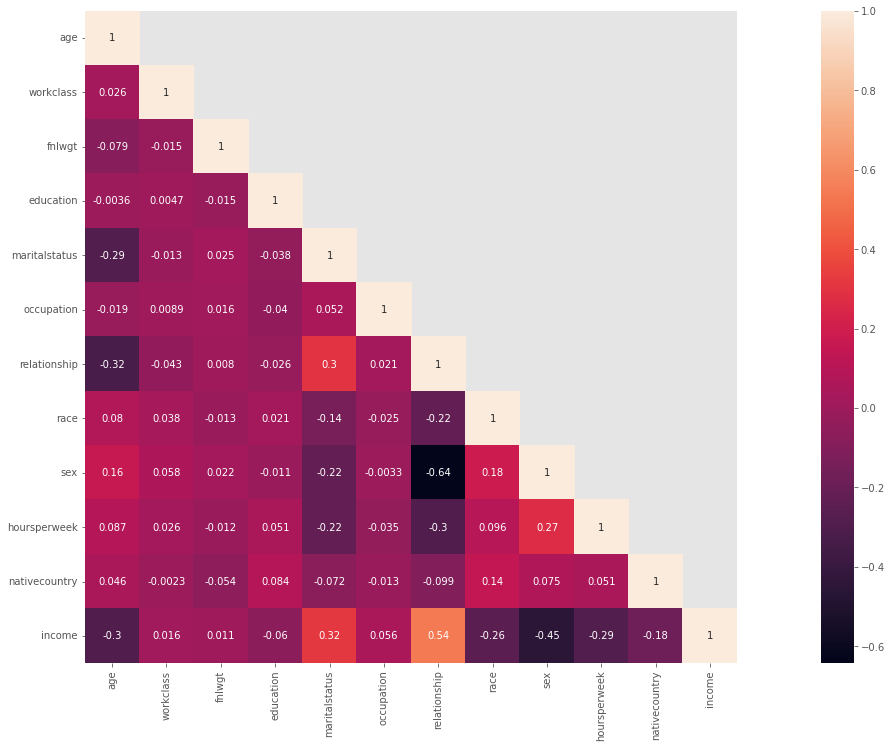

In [6]:
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [7]:
X = df.drop('income',axis=1).values
y = df['income'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [10]:
classifier = Sequential()

In [11]:
classifier.add(Dense(39528, activation = 'relu', input_dim = 11))

In [12]:
classifier.add(Dense(units =256, kernel_initializer = 'uniform', activation = 'relu'))

In [13]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [14]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
classifier.fit(X_train, y_train, batch_size=32,epochs = 1,verbose = 1)

1236/1236 [==============================] - 150s 122ms/step - loss: 0.2292 - accuracy: 0.9077


In [18]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

309/309 [==============================] - 7s 22ms/step


Text(0.5, 257.44, 'Predicted label')

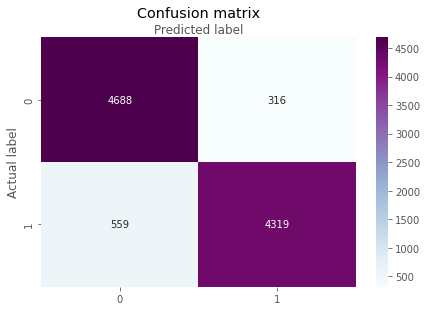

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      5004
           1       0.93      0.89      0.91      4878

    accuracy                           0.91      9882
   macro avg       0.91      0.91      0.91      9882
weighted avg       0.91      0.91      0.91      9882



In [26]:
from sklearn import metrics
accuracy_1 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy_1)

Accuracy: 0.8314551710180126
